<a href="https://colab.research.google.com/github/ravichas/bifx-546/blob/main/Notebooks/Chapter6_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6: Probability





Probability is a mathematical framework for describing & reasoning in data and real-world events.

Quantifying the uncertainty associated with events chosen from some universe of events. Think of rolling a die as an example. Universe in this case is all thepossible outcomes {1, 2, 3, 4, 5, 6}. Any subset of these outcomes (ex die rolls a 1). Here is the math notation:

P(E) = the probability of event E




* We use prob. theory to build models
* These models form the basis of many bioinformatics tasks

# Dependence and Independence

* **Independence:** **Probability of two independent events**, E and F, happening is the product of their probabilities; Ex., Coin flips

$$ P(E,F) = P(E)P(F) $$

* **Dependence:** if the outcome of one event changes the probability of the other.Ex., Drawing cards without replacement. E: First card drawn is Ace; F: Second card drawn is Ace (4/52 --> 3/51)

When two events (E and F) are independent, knowing E tells nothing about F

$$ P(F | E) = P(F) $$

When **events are dependent**, then you may want to use Bayes theorem (more on this later)

# Conitional Probability

$$ P(E,F) = P(E)P(F) \text{ (E & F are independent events)} $$

If E, F ***are not independent and if the prob of F is not zero***, then we define the $P(E|F)$ as

$$ P(E|F) = \frac{P(E, F)} {P(F)} $$

$$ P(E, F) = P(E|F) P(F) $$

When E and F are independent,

$$P(E|F) = P(E) $$

One interesting example,
A family with two (unknown) children
Assumption:
1. Each children is equally likely to be a boy or a girl
2. The gender of the second child is independent of the gender of the first child

**Event definition:**
1. B: both children are girls
2. G: Older child is a girl
3. L: At lease one of the children is a girl

What is the probability of the event "both the children are girls" (B) conditional on the event the "older child is a girl" (G)?

$$ P(B | G ) = \frac{P(B, G)}{P(G)} = \frac{P(B \cap G)}{P(G)}$$
if events B and G are subsets.  
$$ P(B|G) = \frac{P(B)}{P(G)} = 1/2 $$


What is the probability of this event $P(B|L)$

```
{ (G,G), (G,B), (B,G) }

G1 - G2
G1 - B2
B1 - G2

```

$$ P(B|L) = P(B,L)/P(L) = P(B)/P(L) = 1/3 $$



In [1]:
import enum, random
# An Enum is a typed set of enumerated values. We can use them
# to make our code more descriptive and readable.

# Numbers 0 and 1  are still there  under the hood
# But we use Kid.BOY or Kid.GIRL in code
# Note you can also use strings directly. For example,
# A = "Excellent"
class Kid(enum.Enum):
  BOY = 0
  GIRL = 1

def random_kid() -> Kid:
  return random.choice([Kid.BOY, Kid.GIRL])

both_girls  = 0
older_girl  = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
  younger = random_kid()

  older = random_kid()

  if older == Kid.GIRL:
    older_girl += 1
  if older == Kid.GIRL and younger == Kid.GIRL:
    both_girls += 1
  if older == Kid.GIRL or younger == Kid.GIRL:
    either_girl += 1

print("P(both | older):", both_girls / older_girl) # 0.514 ~ 1/2
print("P(both | either): ", both_girls / either_girl) # 0.342 ~ 1/3

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


# Bayes's Theorem

If I know how likely I am to see evidence F given E, what is the probability of E given that I see F?

(flips the conditional prob)

$$ P(E|F) = \frac{P(E,F)}{P(F)} = \frac{P(F|E) P(E)} {P(F)}  $$

P(E): Prior probability of E

P(F): Total prob of seeing F (regardless of E)

P(E|F): Prob. E is true after seeing F



  P(F) can be further split into two mutually exclusive events

  1. `F and E`
  2. `F and not E`

  $$P(F) = P(F,E) + P(F, not E) $$  or
  $$P(F) = P(F,E) + P(F, !E) $$ or
  $$P(F) = P(F,E) + P(F, \neg E) $$

  Plugging this into the earlier eq

  $$ P(E|F) = \frac{P(F|E) P(E)} {P(F|E) P(E) + P(F| \neg E) \space P(\neg E)} $$


# Application-1:

1. S: Event you are a Smoker
2. C: Event, you have a Cancer

  $$ P(C|S) = \frac{P(S|C) P(C)} {P(S|C) P(C) + P(S| !C) \space P(!C)} $$


# Application-2

1. T: Event "Your test is positive"
2. D: Event "You have a disease"

  $$ P(D|T) = \frac{P(T|D) P(D)} {P(T|D) P(D) + P(T| !D) \space P(!D)} $$


 Imagine a certain disease that affects 1 in every 10,000 people. And imagine that there is a test for this disease that gives the correct result (“diseased” if you have the disease, “nondiseased” if you don’t) 99% of the time.

 $P(D) = 10^{-4}$; $P(T|D) = 0.99$

Here we know that, $P(T|D)$, the probability that someone with the disease tests positive, is 0.99. P(D), the probability that any given person has the disease, is 1/10,000 = 0.0001. $P(T|!D)$, the probability that someone without the disease tests positive, is 0.01. And $P(!D), the probability that any given person doesn’t have the disease, is 0.9999. If you substitute these numbers into Bayes’s theorem, you find: (from the book, Data Science from the scratch, 2nd edition)

$$P(D|T) = 0.98\%$$

that is less than 1% of the people who test positive (T) actually have the disease (D)


"Note
This assumes that people take the test more or less at random. If only people with certain symptoms take the test, we would instead have to condition on the event “positive test and symptoms” and the number would likely be a lot higher.

A more intuitive way to see this is to imagine a population of 1 million people. You’d expect 100 of them to have the disease, and 99 of those 100 to test positive. On the other hand, you’d expect 999,900 of them not to have the disease, and 9,999 of those to test positive. That means you’d expect only 99 out of (99 + 9999) positive testers to actually have the disease." (from the book, Data Science from Scratch 2nd Edition)

# Summary

* When 2 events are inependent (E & F), then by definition, we have
  $$ P(E, F) = P(E) P(F) $$
* When they are not independent and if [P(F) $!= 0 $ ], we define
  $$P(E|F)  = P(E,F)/P(F) $$
  we can rewrite the equation as
  $$ P(E, F) = P(E | F)  P(F) $$


# Random Variable

In real life, many things that we care about are uncertain (wont be able to predict accurately), but we will be able to provide a range of possible outcomes.

So, a random variable is simply a way to assign numbers to uncertain events. so we can analyze, model and make decisions.

Random variable: Var associated with a probability distribution

Here are some examples of random events:

1. Weather forecasting. Rain tomorrow? 89% chance
2. Temperature tomorrow? Could be 52-60 deg F.
3. Quality control
4. BP or sugar levels
5. Stock prices

Here we treat Rainfall or temperature as a random variable to quantify uncertainty.

# Discreate and Continuou random variables

1. Discreate variable: (# of emails we receive everyday)
2. Continuous variable: Temperature prediction for tomorrow (continuous); Height, weight etc.

# Expected value of a random variable:

Average of its values weighted by their probabilities.

1. Fair Coin flip variable has an expected value of 0.5
  a. (0 * 1/2 + 1 * 1.2) = 0.5
2. `range(10)` var has an expected value of 4.5




In [2]:
# Expected value of numbers from 0 to 9 each with a prob of 0.1
import numpy as np
temp = np.arange(10) * 0.1
temp.sum()

np.float64(4.500000000000001)

In [3]:
# coin flip variable 0 or 1 with a prob of 0.5

(0.5 * 0) + (0.5 * 1)

0.5

We can assign random variable (X) to events. For example, X, is a random variable representing the number of girls (in our previous example; a family with 2 kids).

```
X    P(X)
=========
0     1/4
1.    1/2
2.    1/4
```

# Continuous distribution

Uniform distribution puts equal weight on all the numbes between 0 and 1. Since there are infinitely many numbers between 0 and 1, means the weight for an individuval point is 0.


For the above reason, we represent continuous distribution with a probability density function (PDF).


Example of PDFs:

1. Daily temperature patterns
2. Distribution of human heights
3. Distribution of measurment error

PDF Summary:
1. PDF describes how probability is distributed over the possible values of a  **continuous** random variable
2. Note the height of the PDF is not a probability
3. The area under the curve over an intervel is the probability
4. shows how dense or likely values in different regions
5. Total area under the curve is 1
6. probabilities come from intervals, not individuval points

$$ P(X = 5) = 0 $$

$$ P(a \le X \le b) = \int_{a}^{b} f(x) dx $$


In [4]:
def uniform_pdf(x: float) -> float:
  return 1 if 0 <= x < 1 else 0

# CDF: Cumulative Distribution Function

CDF: Probability that a random variable is less than or equal to a certain value

# Normal Distribution

ND is a special type of PDF.

$$ f(x | \mu, \sigma) = \frac{1}{\sqrt{(2\pi}\sigma)} exp \bigl ( \frac{-(x-\mu)^2}{2\sigma^2} \bigr ) $$

why do we care about normal distribution.

1. It describes many real-world continuous phenomena
2. It is bell-shaped
3. defined by mean ($\mu$, $\sigma$)

In [5]:
import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)
def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
  return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))



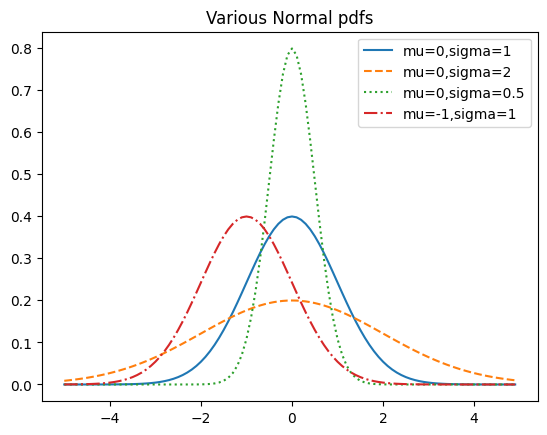

In [6]:
import matplotlib.pyplot as plt
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-'
,label='mu=0,sigma=1')

plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--'
,label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

When $\mu=0$ and $\sigma=1$, the curve is called standard normal distribution.

One could take a standard normal and make it into a normal distribution.

$$ X = \sigma Z + \mu $$

Where Z is a standard normal random variable. One could take a normal random variable with $\mu$ and $\sigma$ and convert it into Z using the following equation

$$Z = (X - \mu)/\sigma $$

The CDF for the normal distribution cannot be written in an “elementary” manner,
but we can write it using Python’s math.erf error function:

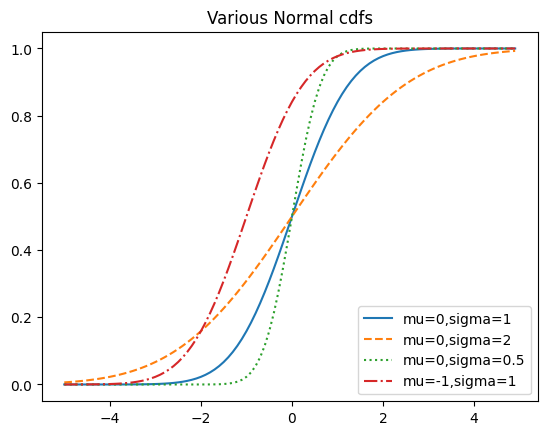

In [7]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
  return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

# Again, in Figure 6-3, we plot a few CDFs:
xs = [x / 10.0 for x in range(-50, 50)]

plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-'
,label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--'
,label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

# The Central Limit Theorem (CLT)

A random variable defined as the average of a large number of
independent and identically distributed random variables is itself approximately normally distributed.

In particular, if $x1, ..., xn$ are random variables with mean μ and standard deviation σ, and if n is large (n >= 30), then:

$$ \frac{1}{n}(x_1 + ... + x_n) $$

is approximately normally distributed with mean μ and standard deviation σ/ n.
Equivalently (but often more usefully),

$$ \frac{(x_1 + ... + x_n) - \mu n}{\sigma\sqrt{n}} $$

is approximately normally distributed with mean 0 and standard deviation 1.

# Example

In [8]:
import random

def bernoulli_trial(p: float) -> int:
  """Returns 1 with probability p and 0 with probability 1-p"""
  return 1 if random.random() < p else 0

def binomial(n: int, p: float) -> int:
  """Returns the sum of n bernoulli(p) trials"""
  return sum(bernoulli_trial(p) for _ in range(n))

Inputs:

	•	p = probability of success
	•	n = number of trials in each binomial draw
	•	num_points = how many samples to simulate

Steps:

* Generate Binomial samples; runs binomial(n, p) num_point times and collect the results into a list called `data`
* Counter converts list into a dictionary
* plot the histogram as barplot
* overlay the normal approximation; Binomial(n, p) is ≈ Normal if, n is large and np * n(1-p) are both $\ge$ 5
* Compute theoretical mean and SD for a Binomial(n, p) random variable, mean and SD are given below:
$$\mu = np$$
$$\sigma = \sqrt{np(1-p)} $$


Original population is Bernoulli(0.75)"
* Outcome 0 with probability 0.25
* Outcome 1 with probability 0.75

Think if this as a loaded coin exercise.


In [9]:
from collections import Counter
def binomial_histogram(p: float, n: int, num_points: int) -> None:
  """Picks points from a Binomial(n, p) and plots their histogram"""
  data = [binomial(n, p) for _ in range(num_points)]

  # use a bar chart to show the actual binomial samples
  histogram = Counter(data)
  plt.bar([x - 0.4 for x in histogram.keys()],
  [v / num_points for v in histogram.values()],
  0.8, color='0.75')

  mu = p * n

  sigma = math.sqrt(n * p * (1 - p))

  # use a line chart to show the normal approximation
  xs = range(min(data), max(data) + 1)
  ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
  for i in xs]
  plt.plot(xs,ys)
  plt.title("Binomial Distribution vs. Normal Approximation")

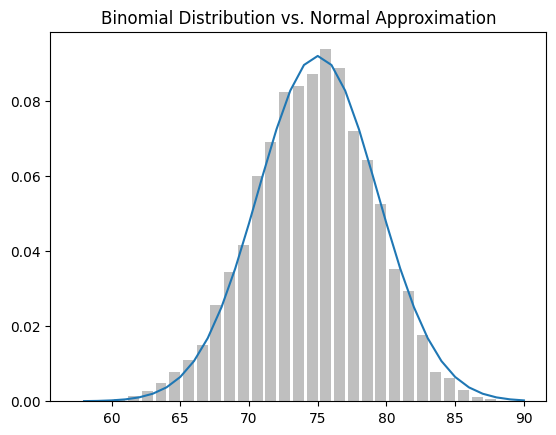

In [10]:
binomial_histogram(0.75, 100, 10000)

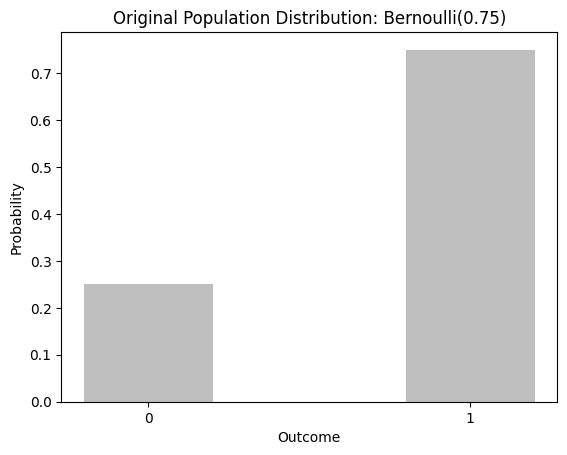

In [11]:
# original population distribution

import matplotlib.pyplot as plt

p = 0.75

# Outcomes and their probabilities
xs = [0, 1]
ps = [1 - p, p]

plt.bar(xs, ps, color='0.75', width=0.4)
plt.xticks(xs)
plt.xlabel("Outcome")
plt.ylabel("Probability")
plt.title("Original Population Distribution: Bernoulli(0.75)")
plt.show()

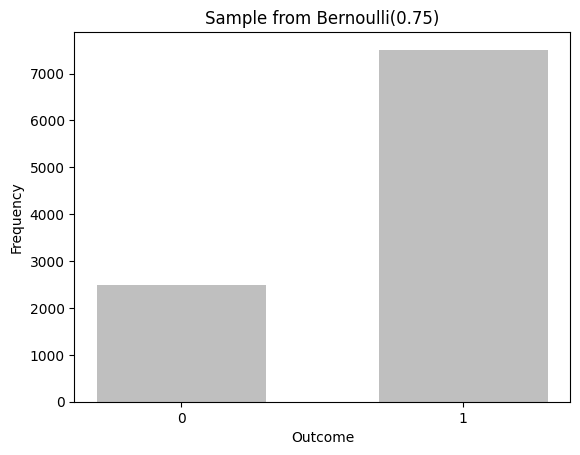

In [12]:
import random
import matplotlib.pyplot as plt

p = 0.75
num_points = 10000

data = [1 if random.random() < p else 0 for _ in range(num_points)]

plt.hist(data, bins=[-0.5, 0.5, 1.5], rwidth=0.6, color='0.75')
plt.xticks([0, 1])
plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.title("Sample from Bernoulli(0.75)")
plt.show()